<a href="https://colab.research.google.com/github/lingesh0/kovai.co_task/blob/main/kovai_co_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction and Objectives


### Introduction

This notebook performs an Exploratory Data Analysis (EDA) on the `Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv` dataset. This dataset contains daily public transport passenger journey data, categorized by different service types.

### Objectives of the EDA

The primary objectives of this EDA are as follows:

1.  **Data Loading and Preprocessing**: Load the dataset, inspect its structure, data types, and handle any missing values or inconsistencies to prepare it for analysis.
2.  **Overall Trend Analysis with Rolling Means**: Analyze the overall daily passenger journey trends across all service types, using rolling means to smooth out short-term fluctuations and highlight long-term patterns.
3.  **Weekly Seasonality Analysis**: Investigate weekly patterns in passenger journeys to identify potential cyclical behaviors related to weekdays and weekends.
4.  **Service-wise Comparison of Statistics**: Compare key statistical measures (e.g., mean, median, standard deviation) for passenger journeys across different service types to understand their individual characteristics and performance.
5.  **Seasonal Decomposition of a Major Service**: Perform seasonal decomposition on a prominent service type to separate its trend, seasonal, and residual components, providing deeper insights into its underlying patterns.
6.  **Yearly Ridership Trends**: Examine how passenger ridership has evolved over different years for various service types.
7.  **Correlation Analysis between Different Service Types**: Determine the correlation between passenger journey numbers for different public transport service types to understand their interdependencies.
8.  **Summarize Key Findings**: Consolidate all observations and insights derived from the EDA to provide a comprehensive understanding of the public transport passenger journey data.

## Load Libraries and Data



In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv')

# Display the first 5 rows of the DataFrame
print(df.head())

         Date  Local Route  Light Rail  Peak Service  Rapid Route  School  \
0  30/08/2024        16436       10705           225        19026    3925   
1  15/09/2023        15499       10671           267        18421    4519   
2  28/12/2021         1756        2352             0         3775       0   
3  11/01/2023        10536        8347           223        14072       0   
4  11/09/2021          820         612             0         1283       0   

   Other  
0   59.0  
1   61.0  
2   13.0  
3   48.0  
4   11.0  


**Reasoning**:
Now that the data is loaded, I need to inspect its structure and data types to identify any inconsistencies or issues that need to be addressed in the preprocessing step. Displaying info and data types is a good first step.



In [2]:
print(df.info())
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1898 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB
None
Date             object
Local Route       int64
Light Rail        int64
Peak Service      int64
Rapid Route       int64
School            int64
Other           float64
dtype: object


**Reasoning**:
Based on the `df.info()` output, the 'Date' column is currently an 'object' type and needs to be converted to datetime objects for proper time-series analysis. Additionally, the 'Other' column has missing values that need to be handled. These are essential preprocessing steps to ensure data quality and prepare the DataFrame for further analysis.



In [12]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Handle missing values in 'Other' column. For now, fill with the median, a robust measure for potentially skewed data.
# We will re-evaluate this strategy if further analysis suggests a different approach.
df['Other'].fillna(df['Other'].median(), inplace=True)

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1918 non-null   datetime64[ns]
 1   Local Route   1918 non-null   int64         
 2   Light Rail    1918 non-null   int64         
 3   Peak Service  1918 non-null   int64         
 4   Rapid Route   1918 non-null   int64         
 5   School        1918 non-null   int64         
 6   Other         1918 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 105.0 KB
None
        Date  Local Route  Light Rail  Peak Service  Rapid Route  School  \
0 2024-08-30        16436       10705           225        19026    3925   
1 2023-09-15        15499       10671           267        18421    4519   
2 2021-12-28         1756        2352             0         3775       0   
3 2023-01-11        10536        8347           223        14072

/tmp/ipython-input-296934074.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Other'].fillna(df['Other'].median(), inplace=True)


**Reasoning**:
The previous code block produced a `FutureWarning` regarding the use of `inplace=True` with chained assignment. To address this warning and ensure future compatibility, the `.fillna()` operation should be assigned back to the column explicitly.



In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Handle missing values in 'Other' column. For now, fill with the median, a robust measure for potentially skewed data.
# We will re-evaluate this strategy if further analysis suggests a different approach.
df['Other'] = df['Other'].fillna(df['Other'].median())

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1918 non-null   datetime64[ns]
 1   Local Route   1918 non-null   int64         
 2   Light Rail    1918 non-null   int64         
 3   Peak Service  1918 non-null   int64         
 4   Rapid Route   1918 non-null   int64         
 5   School        1918 non-null   int64         
 6   Other         1918 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 105.0 KB
None
        Date  Local Route  Light Rail  Peak Service  Rapid Route  School  \
0 2024-08-30        16436       10705           225        19026    3925   
1 2023-09-15        15499       10671           267        18421    4519   
2 2021-12-28         1756        2352             0         3775       0   
3 2023-01-11        10536        8347           223        14072

## Data Preprocessing and Inspection




In [5]:
df = df.sort_values(by='Date').reset_index(drop=True)
print("DataFrame after sorting by Date:\n")
print(df.head())

print("\nDescriptive statistics for the DataFrame:\n")
print(df.describe())

DataFrame after sorting by Date:

        Date  Local Route  Light Rail  Peak Service  Rapid Route  School  \
0 2019-07-01        15987        9962           407        21223    3715   
1 2019-07-02        16895       10656           409        21715    3993   
2 2019-07-03        16613       10658           427        22025    3638   
3 2019-07-04        16604       10445           437        21868    3576   
4 2019-07-05        16040       10532           400        20697    2856   

   Other  
0   40.0  
1   40.0  
2   40.0  
3   40.0  
4   40.0  

Descriptive statistics for the DataFrame:

                      Date   Local Route    Light Rail  Peak Service  \
count                 1918   1918.000000   1918.000000   1918.000000   
mean   2022-02-13 12:00:00   9891.395203   7195.446298    179.581335   
min    2019-07-01 00:00:00      1.000000      0.000000      0.000000   
25%    2020-10-22 06:00:00   3044.500000   4463.500000      0.000000   
50%    2022-02-13 12:00:00  11417.00000

## Overall Trend Analysis with Rolling Mean



**Reasoning**:
First, I need to create a 'Total_Passengers' column by summing all service-related columns to represent the total daily ridership. Then, to facilitate time-series plotting and rolling mean calculation, I will set the 'Date' column as the DataFrame index.



In [6]:
service_columns = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']
df['Total_Passengers'] = df[service_columns].sum(axis=1)

df = df.set_index('Date')

print(df.head())

            Local Route  Light Rail  Peak Service  Rapid Route  School  Other  \
Date                                                                            
2019-07-01        15987        9962           407        21223    3715   40.0   
2019-07-02        16895       10656           409        21715    3993   40.0   
2019-07-03        16613       10658           427        22025    3638   40.0   
2019-07-04        16604       10445           437        21868    3576   40.0   
2019-07-05        16040       10532           400        20697    2856   40.0   

            Total_Passengers  
Date                          
2019-07-01           51334.0  
2019-07-02           53708.0  
2019-07-03           53401.0  
2019-07-04           52970.0  
2019-07-05           50565.0  


**Reasoning**:
Now that the `Total_Passengers` column is created and the `Date` column is set as the index, I will generate a line plot showing daily passenger counts for all individual service types, calculate and plot the 30-day rolling mean for the total passenger count on the same plot, and ensure appropriate labels, title, and legends are included.



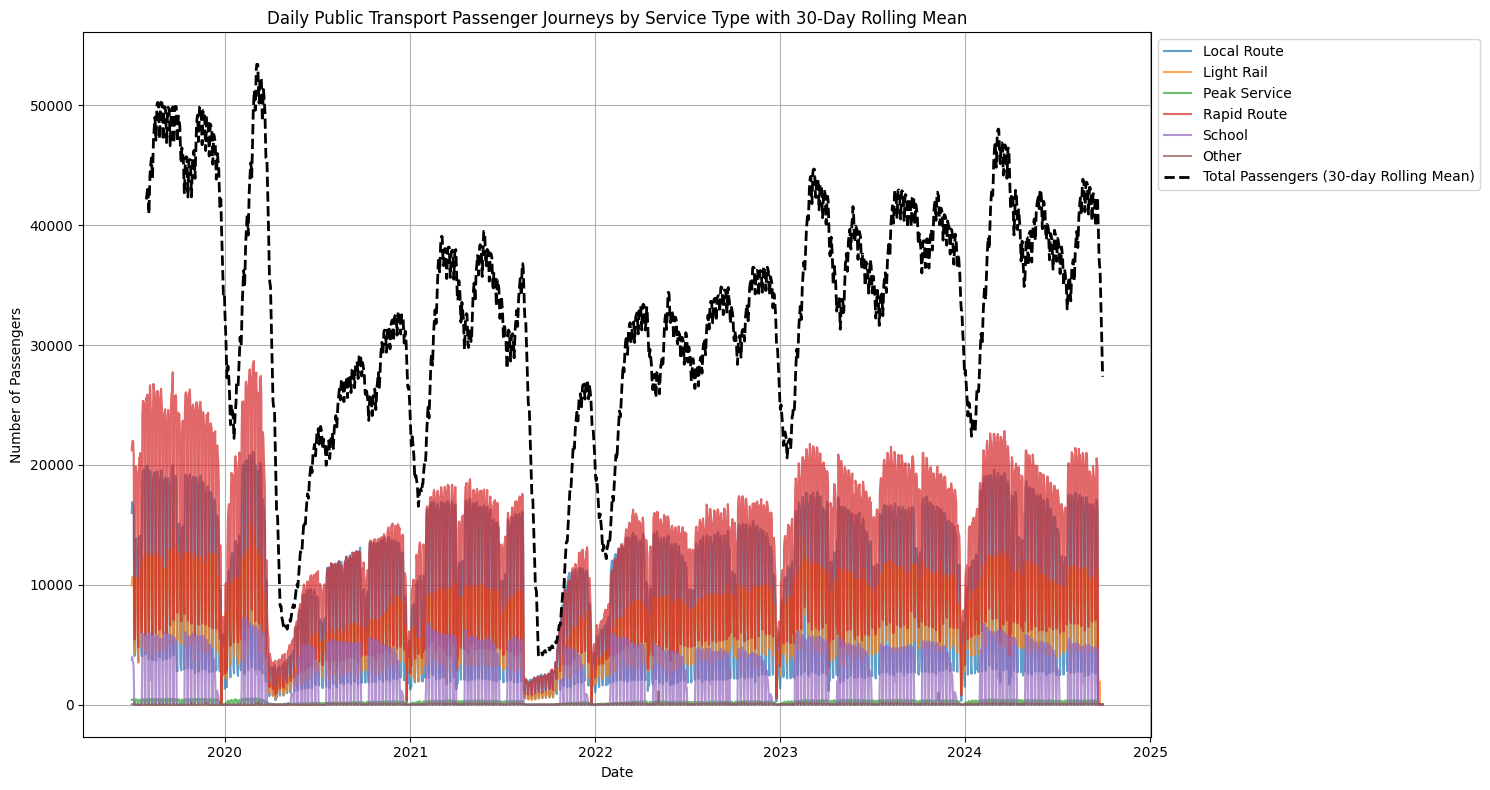

In [7]:
plt.figure(figsize=(15, 8))

# Plot individual service types
for col in service_columns:
    plt.plot(df.index, df[col], label=col, alpha=0.7)

# Calculate 30-day rolling mean for Total_Passengers
df['Total_Passengers_Rolling_Mean'] = df['Total_Passengers'].rolling(window=30).mean()

# Plot the 30-day rolling mean
plt.plot(df.index, df['Total_Passengers_Rolling_Mean'], color='black', linestyle='--', linewidth=2, label='Total Passengers (30-day Rolling Mean)')

plt.title('Daily Public Transport Passenger Journeys by Service Type with 30-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

### Observed Insights from Overall Trend Analysis

From the generated plot showing daily public transport passenger journeys and the 30-day rolling mean, several key insights can be observed:

1.  **Overall Trend:** The 30-day rolling mean (black dashed line) provides a smoothed view of the total passenger journeys. It indicates a significant dip in ridership around late 2019 to early 2021, likely reflecting the impact of the COVID-19 pandemic and associated restrictions. Following this period, there appears to be a gradual recovery in passenger numbers, although it may not have fully returned to pre-pandemic levels across all services.

2.  **Fluctuations:** The individual service lines show considerable daily and weekly fluctuations, particularly for services like 'Local Route' and 'Rapid Route', which typically have higher passenger volumes. The rolling mean helps to filter out these short-term variations, making the underlying trend more apparent.

3.  **Dominant Service Types:** 'Local Route' and 'Rapid Route' consistently show the highest passenger counts, indicating they are the primary modes of public transport in terms of ridership. 'Light Rail' also contributes significantly.

4.  **Impact of 'School' Service:** The 'School' service line exhibits distinct seasonal patterns, with sharp drops during school holidays and peaks during term time, highlighting its specific user base and operational schedule.

5.  **'Peak Service' and 'Other' Contributions:** 'Peak Service' and 'Other' categories generally represent a much smaller proportion of the total passenger journeys. 'Peak Service' shows some variation but remains low compared to the main services. The 'Other' category, while minor, also follows some general trends, albeit at a very low scale.

6.  **Inter-Service Dynamics:** The plot allows for a visual comparison of how different service types respond to external factors (like the pandemic) and how their individual trends contribute to the overall public transport usage.

## Weekly Seasonality Analysis



**Reasoning**:
First, I will add a 'day_of_week' column to the DataFrame by extracting the day name from the 'Date' index. This column will be used for analyzing weekly seasonality.



In [8]:
df['day_of_week'] = df.index.day_name()

print(df.head())

            Local Route  Light Rail  Peak Service  Rapid Route  School  Other  \
Date                                                                            
2019-07-01        15987        9962           407        21223    3715   40.0   
2019-07-02        16895       10656           409        21715    3993   40.0   
2019-07-03        16613       10658           427        22025    3638   40.0   
2019-07-04        16604       10445           437        21868    3576   40.0   
2019-07-05        16040       10532           400        20697    2856   40.0   

            Total_Passengers  Total_Passengers_Rolling_Mean day_of_week  
Date                                                                     
2019-07-01           51334.0                            NaN      Monday  
2019-07-02           53708.0                            NaN     Tuesday  
2019-07-03           53401.0                            NaN   Wednesday  
2019-07-04           52970.0                            NaN   

**Reasoning**:
Now that the 'day_of_week' column is available, I will create boxplots for each service type to visualize the passenger counts across different days of the week. This will help identify weekday vs. weekend ridership patterns. I'll arrange these plots in subplots for better comparison.



/tmp/ipython-input-2049139264.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_of_week', y=col, data=df, ax=axes[i], order=day_order, palette='viridis')
/tmp/ipython-input-2049139264.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_of_week', y=col, data=df, ax=axes[i], order=day_order, palette='viridis')
/tmp/ipython-input-2049139264.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day_of_week', y=col, data=df, ax=axes[i], order=day_order, palette='viridis')
/tmp/ipython-input-2049139264.py:7: FutureWarning: 

Passi

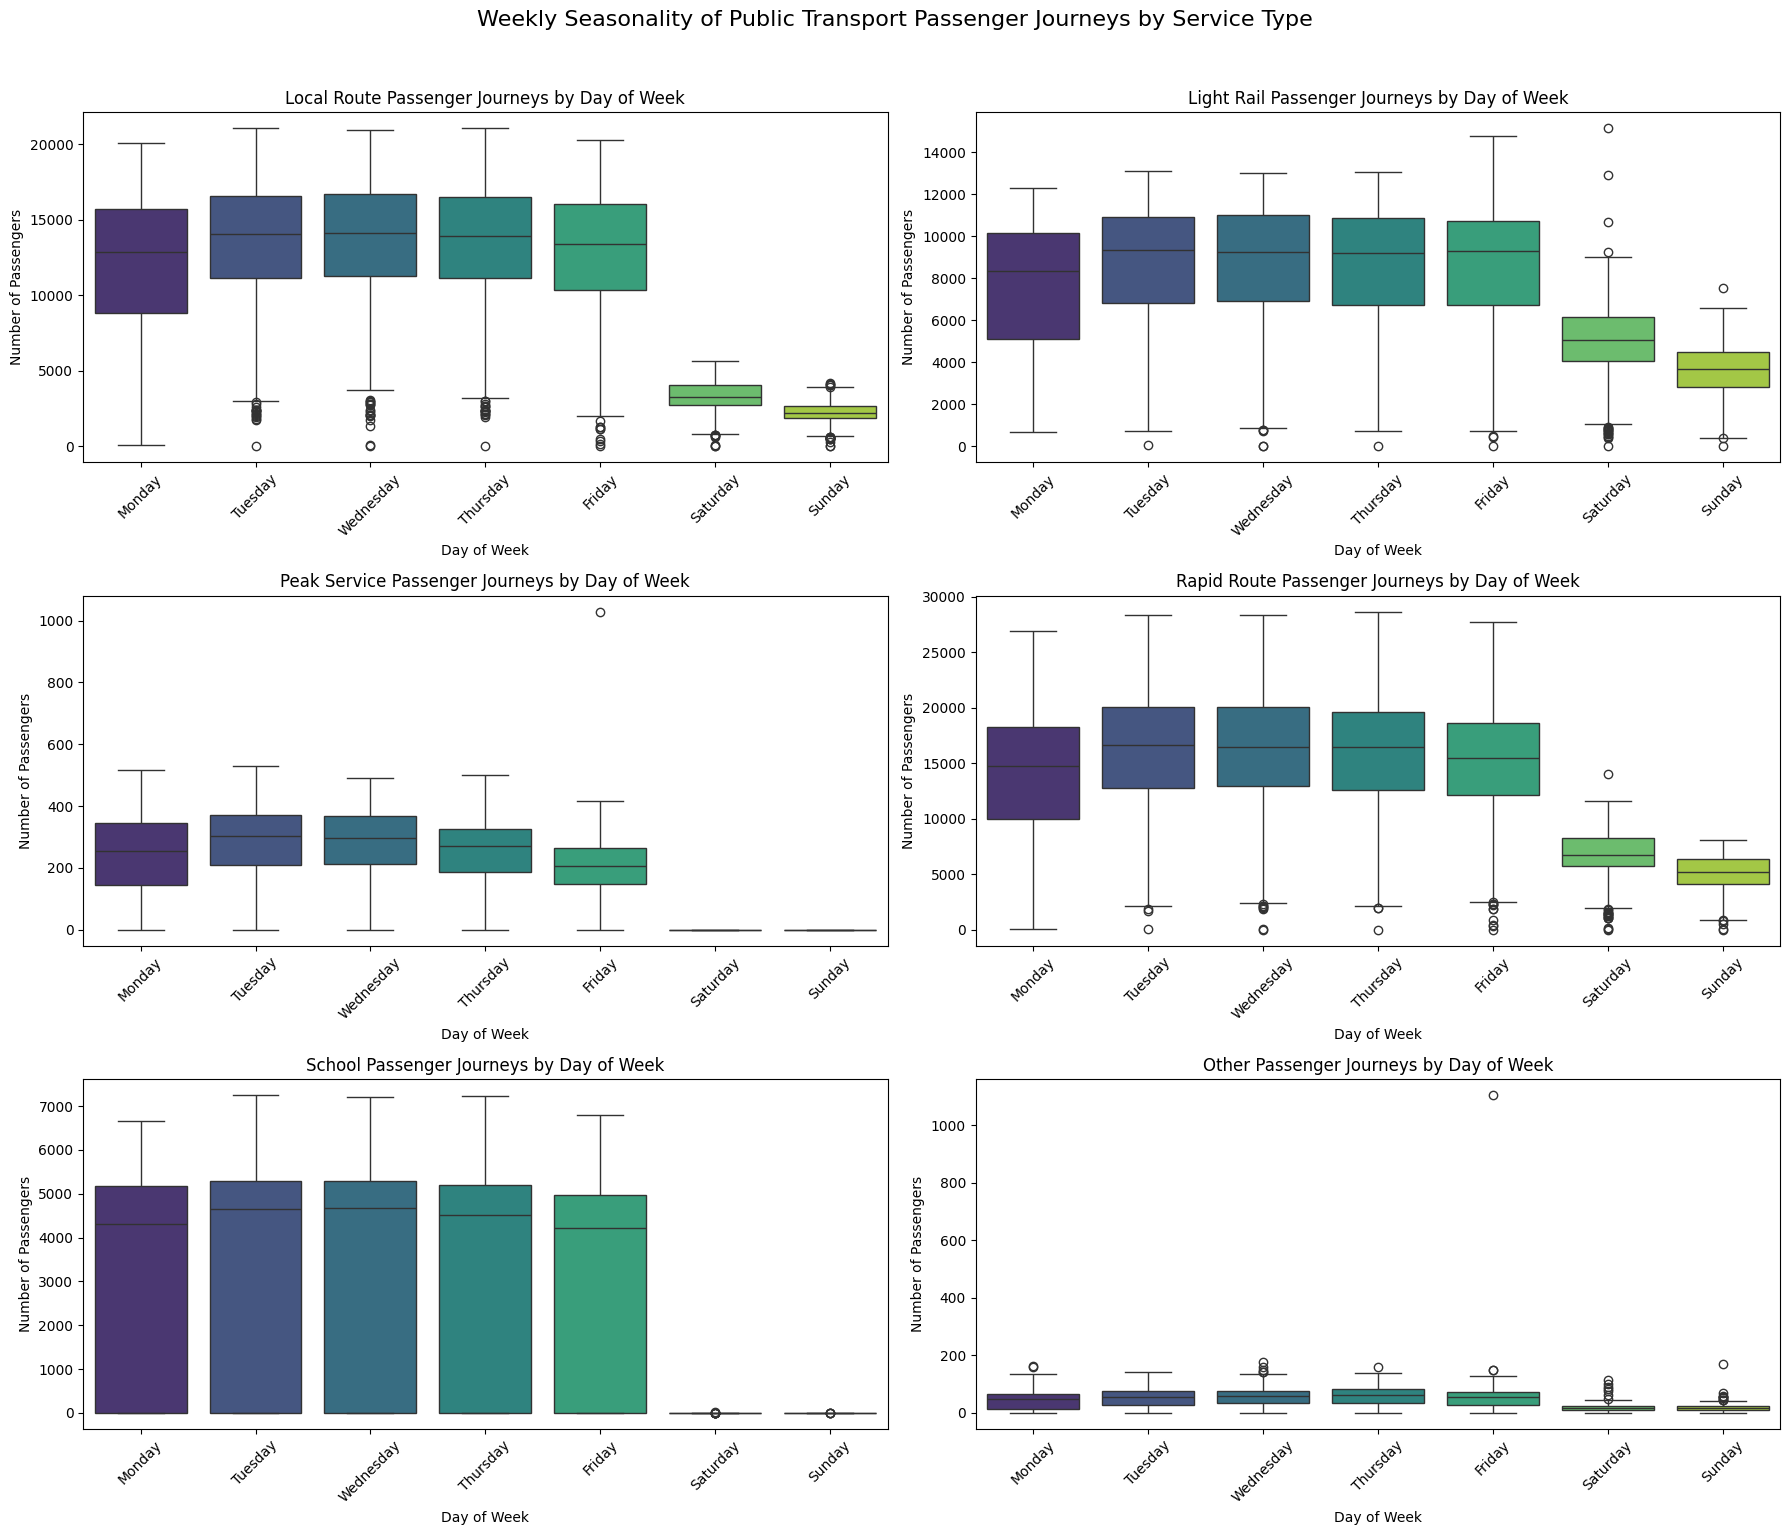

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
axes = axes.flatten()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for i, col in enumerate(service_columns):
    sns.boxplot(x='day_of_week', y=col, data=df, ax=axes[i], order=day_order, palette='viridis')
    axes[i].set_title(f'{col} Passenger Journeys by Day of Week')
    axes[i].set_xlabel('Day of Week')
    axes[i].set_ylabel('Number of Passengers')
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle('Weekly Seasonality of Public Transport Passenger Journeys by Service Type', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code block produced a `FutureWarning` due to the way `palette` was used with `seaborn.boxplot`. To address this and align with future seaborn versions, I will explicitly set `hue='day_of_week'` and `legend=False` as suggested by the warning.



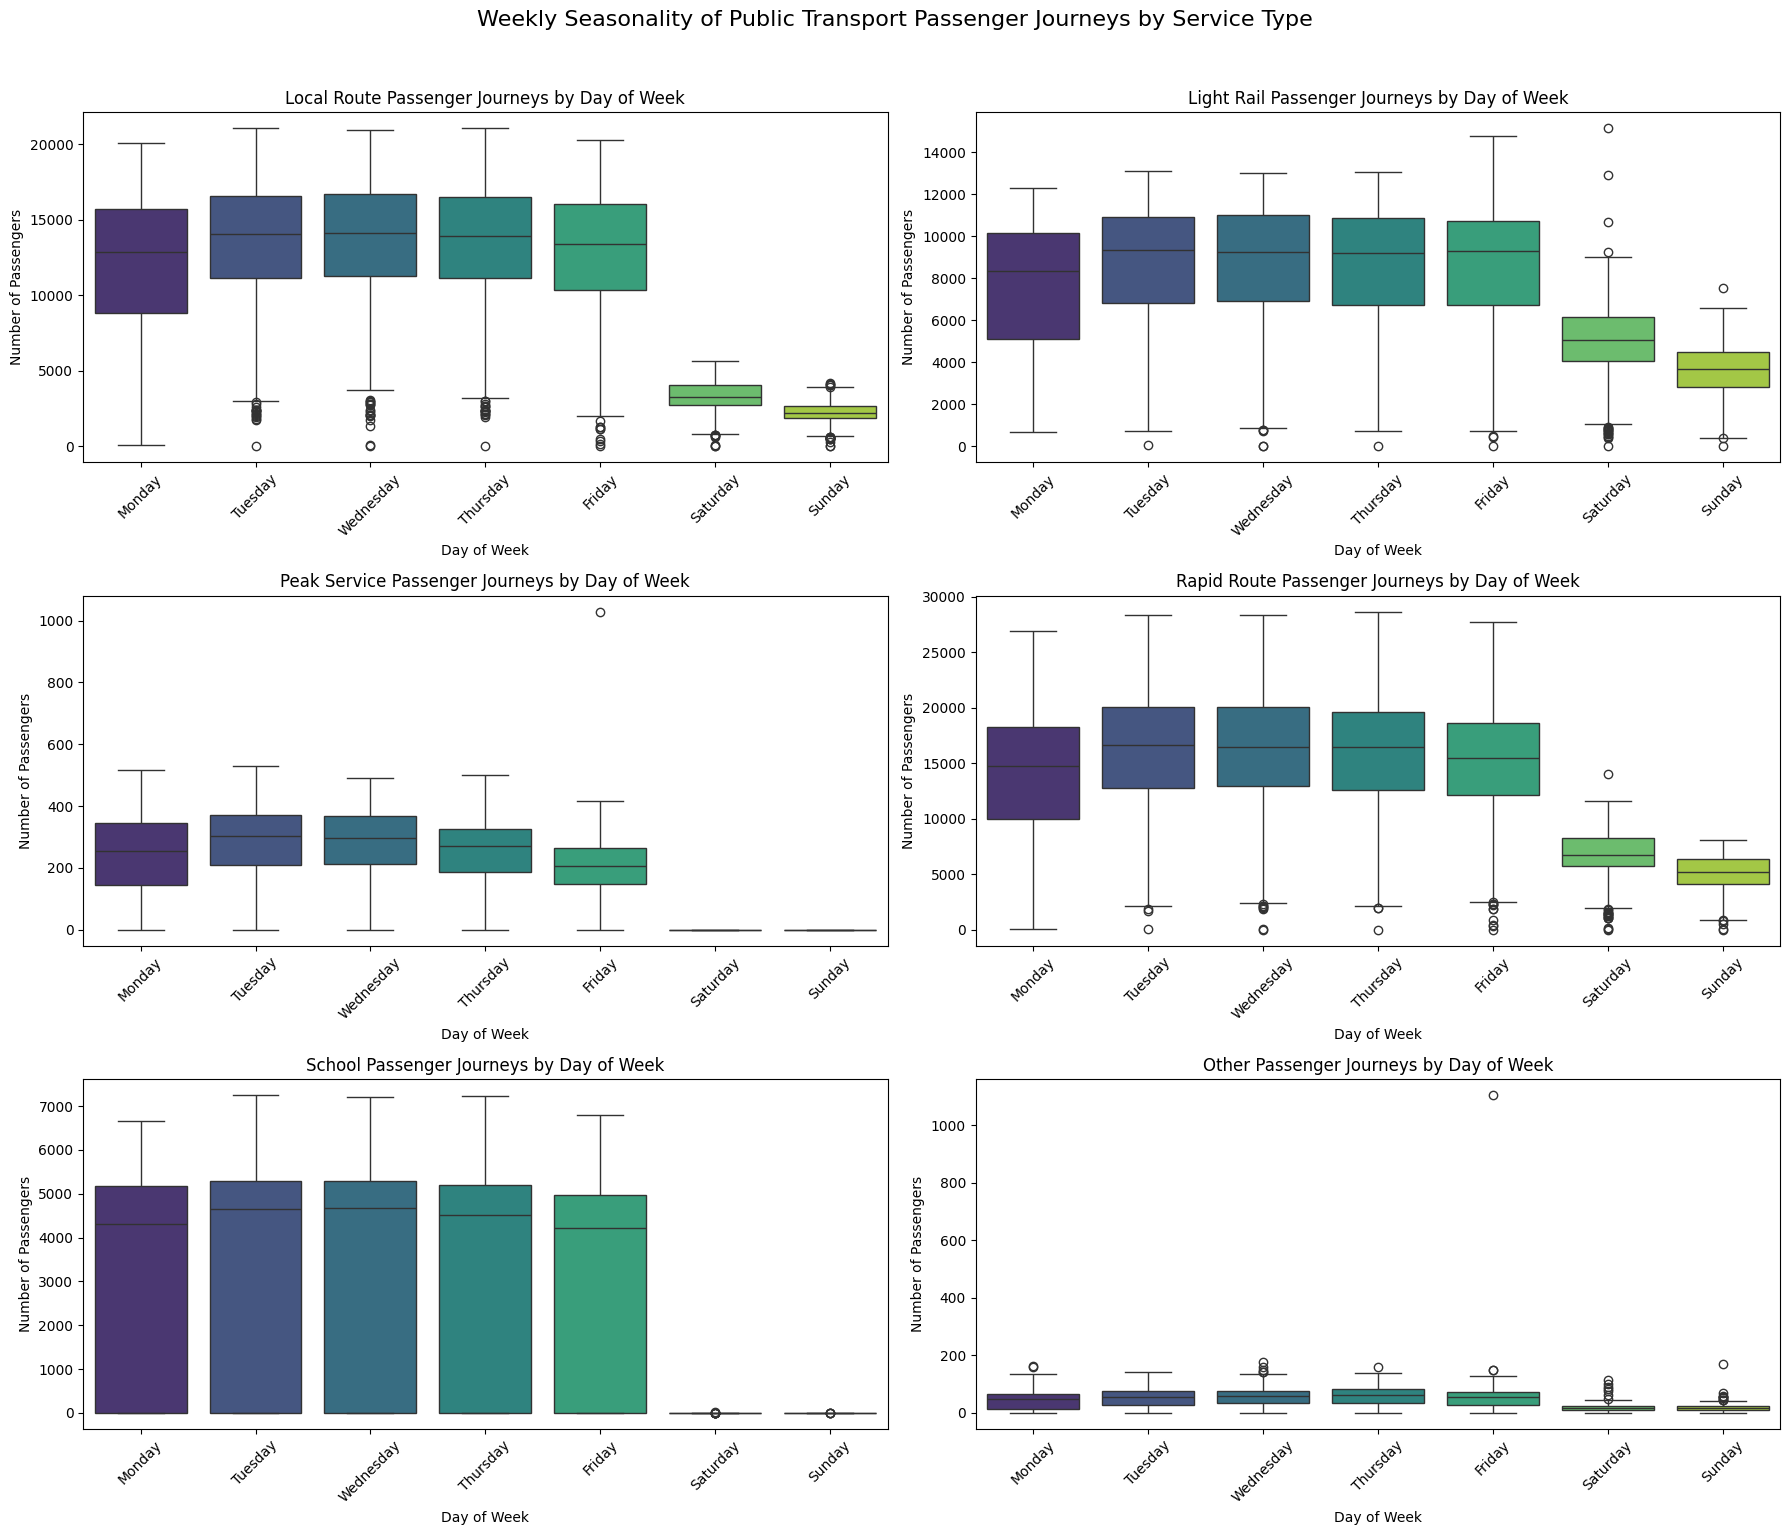

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
axes = axes.flatten()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for i, col in enumerate(service_columns):
    sns.boxplot(x='day_of_week', y=col, data=df, ax=axes[i], order=day_order, hue='day_of_week', legend=False, palette='viridis')
    axes[i].set_title(f'{col} Passenger Journeys by Day of Week')
    axes[i].set_xlabel('Day of Week')
    axes[i].set_ylabel('Number of Passengers')
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle('Weekly Seasonality of Public Transport Passenger Journeys by Service Type', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

**Reasoning**:
The traceback indicates that the `day_of_week` column was not found in the DataFrame `df` when `seaborn.boxplot` was called. This suggests that previous data preprocessing steps, specifically adding the `day_of_week` column and setting the 'Date' column as the index, might not have persisted or were lost. To fix this, I will re-apply all necessary data preparation steps, including date conversion, handling missing values, sorting, creating the 'Total_Passengers' column, setting 'Date' as index, and creating 'day_of_week', directly before the plotting code. I will also incorporate the suggested fix for the `FutureWarning` by explicitly setting `hue='day_of_week'` and `legend=False` in the boxplot call.



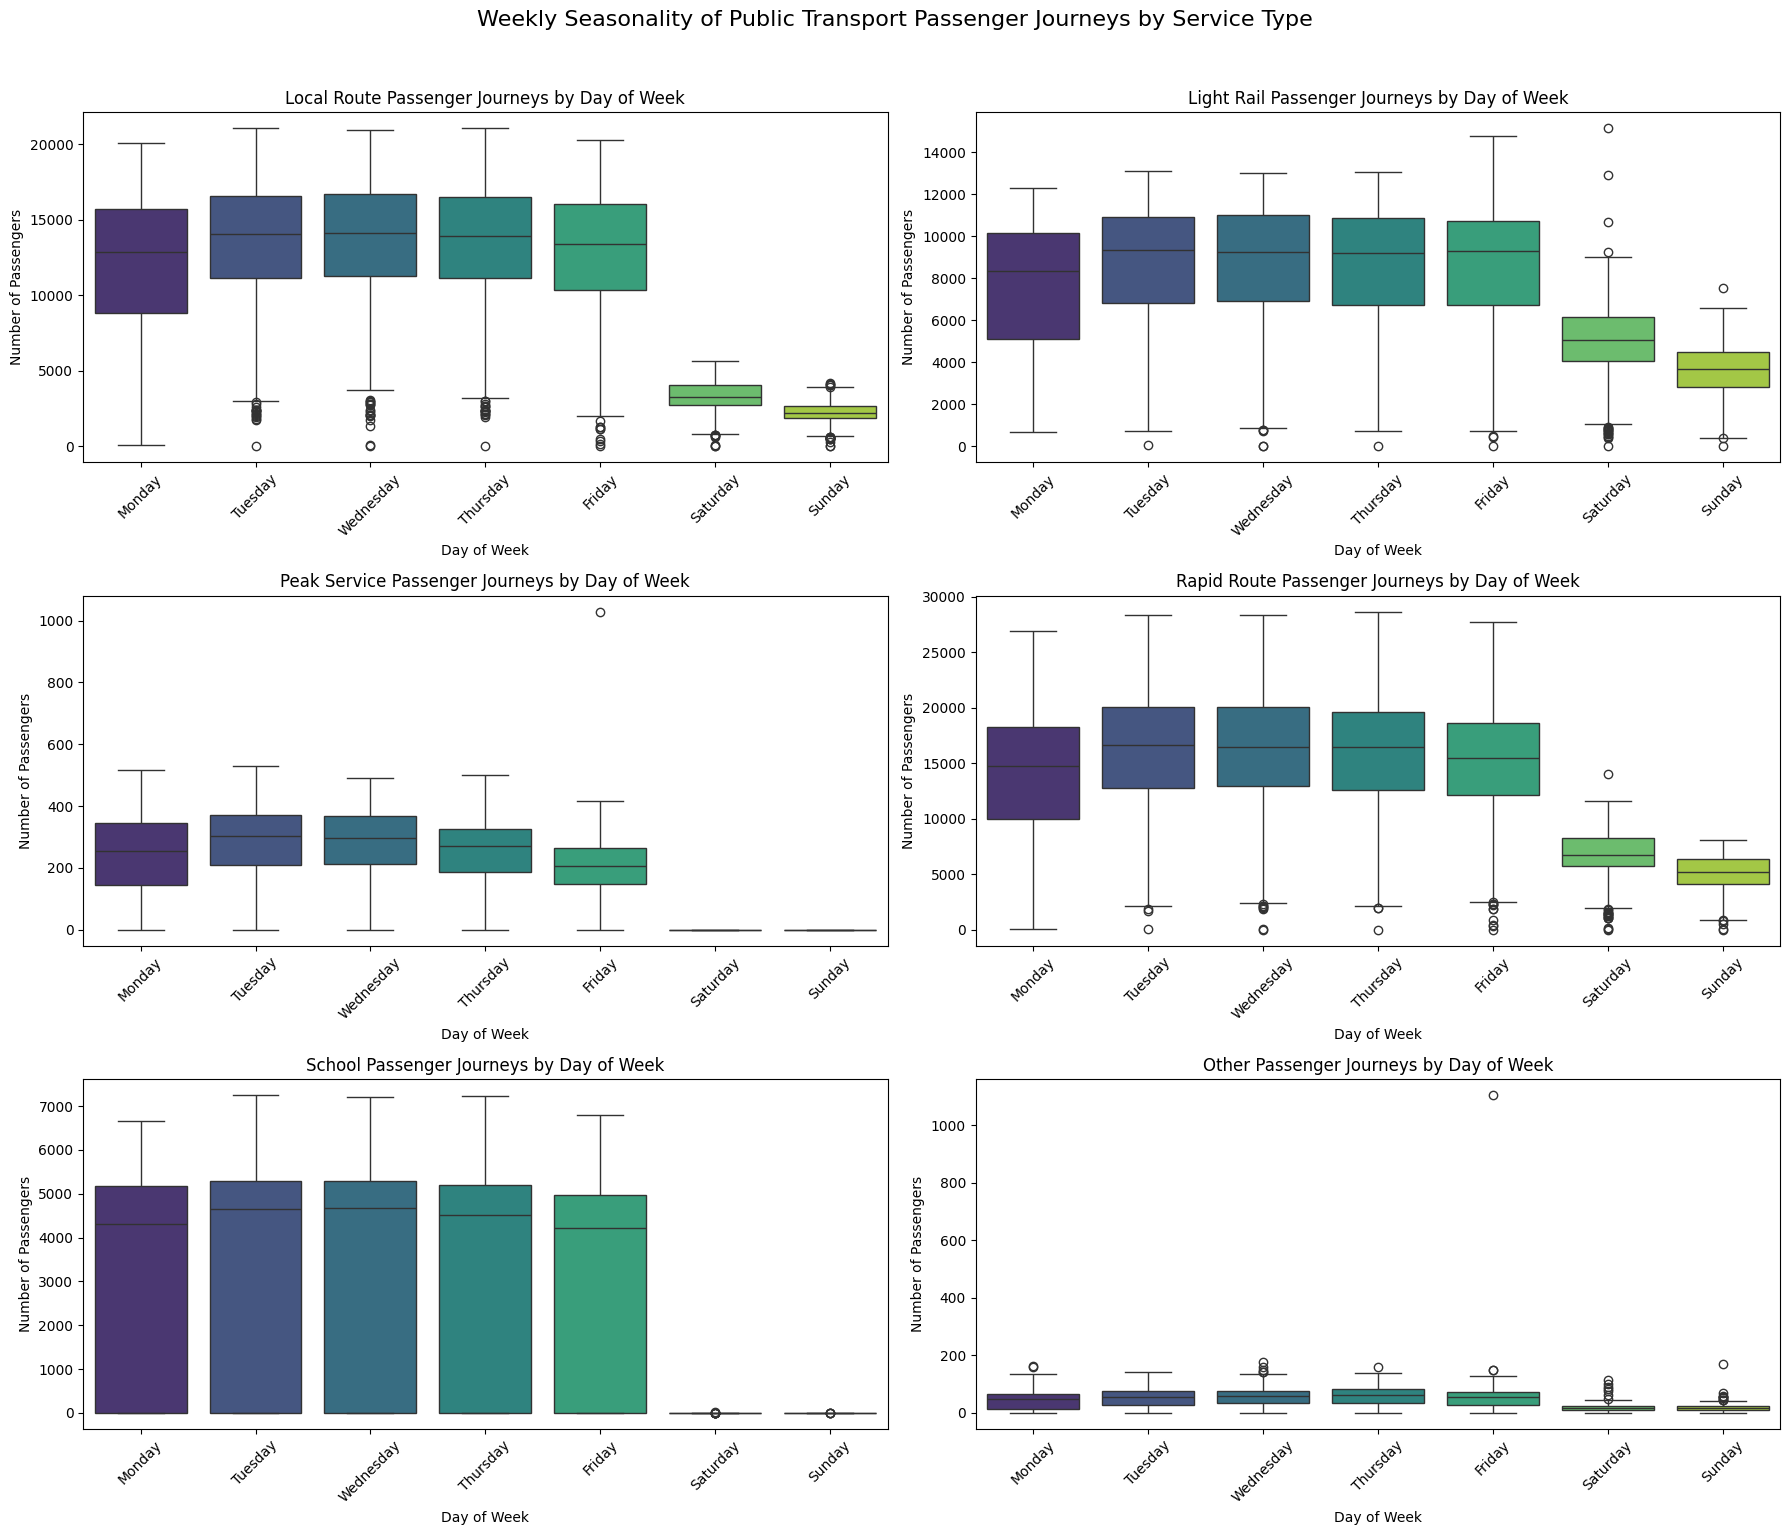

In [13]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Other'] = df['Other'].fillna(df['Other'].median())
df = df.sort_values(by='Date').reset_index(drop=True)

service_columns = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']
df['Total_Passengers'] = df[service_columns].sum(axis=1)

df = df.set_index('Date')
df['day_of_week'] = df.index.day_name()

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
axes = axes.flatten()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for i, col in enumerate(service_columns):
    sns.boxplot(x='day_of_week', y=col, data=df, ax=axes[i], order=day_order, hue='day_of_week', legend=False, palette='viridis')
    axes[i].set_title(f'{col} Passenger Journeys by Day of Week')
    axes[i].set_xlabel('Day of Week')
    axes[i].set_ylabel('Number of Passengers')
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle('Weekly Seasonality of Public Transport Passenger Journeys by Service Type', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

### Observed Insights from Weekly Seasonality Analysis

The boxplots visualizing daily passenger journeys by day of the week for each service type reveal distinct weekly patterns:

1.  **Local Route, Light Rail, Rapid Route, and Peak Service:**
    *   These services generally exhibit significantly higher ridership during **weekdays (Monday to Friday)** compared to weekends (Saturday and Sunday).
    *   Ridership typically peaks in the middle of the week (Tuesday to Thursday) for many of these services, with a slight dip on Monday and Friday.
    *   Saturday and Sunday show considerably lower median passenger counts and reduced variability, indicating a consistent drop in demand during non-working days.
    *   'Peak Service' is almost non-existent on weekends, which is expected given its nature.

2.  **School:**
    *   The 'School' service shows a very strong weekly pattern, with high passenger counts exclusively during **weekdays**.
    *   Ridership for 'School' service is almost zero on weekends, clearly indicating its purpose as a service tied to the school week.

3.  **Other:**
    *   The 'Other' service category, while having much lower passenger numbers overall, also tends to follow the general trend of higher ridership during weekdays and lower on weekends, though the differences are less pronounced due to the smaller scale of journeys.

**Overall Conclusion on Weekly Seasonality:**
Public transport usage is heavily concentrated during weekdays, likely driven by commuting for work and school. Weekend ridership drops substantially across most service types, reflecting a shift in daily routines and travel needs. The 'School' service provides the clearest example of this weekday-centric pattern.

## Service-wise Comparison




**Reasoning**:
I need to calculate the mean and variance of daily passenger counts for each service type, then visualize these statistics using bar charts, as per the subtask instructions. First, I will define the `service_columns` and compute the mean and variance.



Service-wise Mean and Variance of Passenger Journeys:

                      Mean      Variance
Local Route    9891.395203  3.746316e+07
Light Rail     7195.446298  1.119315e+07
Peak Service    179.581335  2.450250e+04
Rapid Route   12597.213243  4.516505e+07
School         2352.694995  6.223859e+06
Other            43.355057  1.724738e+03


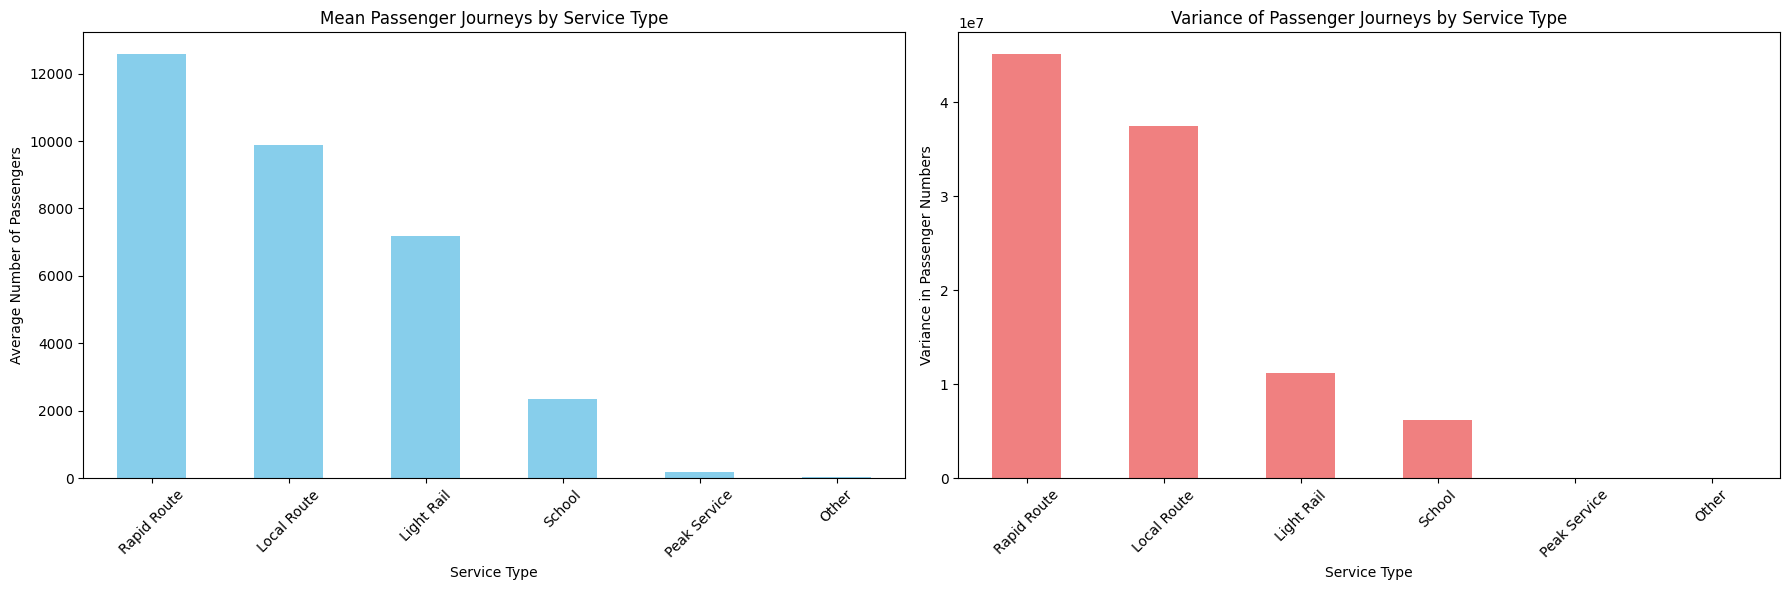

In [14]:
service_columns = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']

# Calculate mean and variance for each service type
service_stats = pd.DataFrame({
    'Mean': df[service_columns].mean(),
    'Variance': df[service_columns].var()
})

print("Service-wise Mean and Variance of Passenger Journeys:\n")
print(service_stats)

# Create subplots for mean and variance
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Bar chart for Mean Passenger Counts
service_stats['Mean'].sort_values(ascending=False).plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Mean Passenger Journeys by Service Type')
axes[0].set_ylabel('Average Number of Passengers')
axes[0].set_xlabel('Service Type')
axes[0].tick_params(axis='x', rotation=45)

# Bar chart for Variance of Passenger Counts
service_stats['Variance'].sort_values(ascending=False).plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Variance of Passenger Journeys by Service Type')
axes[1].set_ylabel('Variance in Passenger Numbers')
axes[1].set_xlabel('Service Type')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Observed Insights from Service-wise Comparison

The comparison of mean and variance across different service types provides valuable insights into their individual contributions and stability:

1.  **Mean Passenger Journeys:**
    *   **Rapid Route** consistently has the highest average daily passenger count, making it the most utilized service. This is followed closely by **Local Route**.
    *   **Light Rail** also shows a substantial average ridership, ranking third.
    *   **School** service has a moderate average ridership, but it's significantly lower than the top three, reflecting its specialized nature.
    *   **Peak Service** and **Other** services have very low average passenger counts, indicating they cater to niche demands or have limited operational scope.

2.  **Variance of Passenger Journeys:**
    *   **Rapid Route** and **Local Route** exhibit the highest variance in passenger numbers. This high variability suggests that their daily ridership fluctuates considerably, likely due to factors like weekdays/weekends, holidays, or other events that impact general commuting patterns. This also aligns with them having the highest mean ridership, as larger numbers often lead to larger absolute variations.
    *   **Light Rail** also shows significant variance, though less than Rapid and Local Routes, which is expected given its lower average ridership.
    *   **School** service has a comparatively lower variance than the major services but higher than Peak Service and Other. This indicates its ridership is somewhat stable during school days but drops dramatically on non-school days, as seen in the weekly seasonality analysis.
    *   **Peak Service** and **Other** have very low variance, which is consistent with their low average passenger counts. Their ridership tends to be more consistent day-to-day, albeit at very small volumes.

## Seasonal Decomposition of a Major Service


**Reasoning**:
I need to perform seasonal decomposition on the 'Rapid Route' service, which is a major service identified previously. I will select the 'Rapid Route' column, apply the `seasonal_decompose` function with an 'additive' model and a period of 7 (for weekly seasonality), and then plot the resulting components (observed, trend, seasonal, residual) to visualize the decomposition.



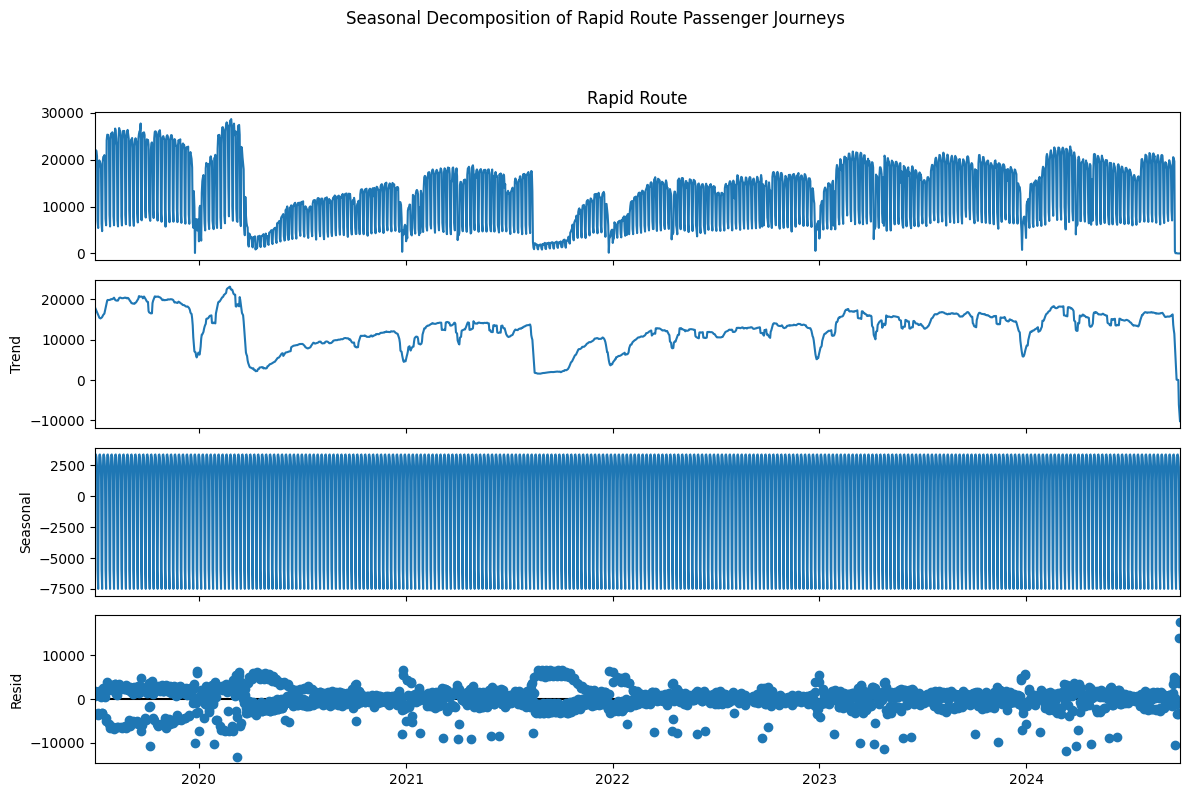

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Select the 'Rapid Route' column for decomposition
rapid_route_data = df['Rapid Route']

# Perform seasonal decomposition
# Use period=7 for weekly seasonality and 'additive' model
decomposition = seasonal_decompose(rapid_route_data, model='additive', period=7, extrapolate_trend='freq')

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.suptitle('Seasonal Decomposition of Rapid Route Passenger Journeys', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

### Observed Insights from Seasonal Decomposition of Rapid Route Service

The seasonal decomposition of the 'Rapid Route' passenger journeys into its observed, trend, seasonal, and residual components provides a clearer understanding of its underlying dynamics:

1.  **Observed (Top Plot):** This shows the original time series data for 'Rapid Route' passenger journeys. It reflects both the long-term trends and the short-term fluctuations, including strong weekly patterns and significant dips.

2.  **Trend (Second Plot):**
    *   The trend component clearly highlights the **long-term evolution** of 'Rapid Route' ridership. We can observe a notable decline in passenger numbers starting around late 2019/early 2020, which is consistent with the onset of the COVID-19 pandemic. This period shows a sharp drop and then a prolonged period of lower ridership.
    *   Following this low period, there's a **gradual recovery** in the trend, indicating that passenger numbers are slowly increasing, although they do not appear to have reached pre-pandemic levels by the end of the observed period.
    *   The trend line smooths out the short-term variations, allowing us to focus on the overall direction of ridership.

3.  **Seasonal (Third Plot):**
    *   The seasonal component reveals a very strong and consistent **weekly seasonality**. There is a clear pattern of higher ridership during weekdays (typically peaking mid-week) and significantly lower ridership during weekends (Saturday and Sunday).
    *   This pattern is highly repetitive throughout the entire time series, confirming the earlier observations from the box plots regarding weekly seasonality for this service type.
    *   The amplitude of the seasonal component represents the typical weekly fluctuation around the trend.

4.  **Residual (Bottom Plot):**
    *   The residual component represents the **random or unexplained variations** in the data after the trend and seasonal components have been removed. Ideally, residuals should be white noise, indicating that the model has captured most of the systematic patterns.
    *   Looking at the plot, the residuals show periods of higher variability and some spikes that are not accounted for by the trend or seasonality. These could be due to external factors such as public holidays, severe weather events, strikes, or other unforeseen disruptions that are not part of the regular weekly cycle or long-term trend.
    *   The magnitude of the residuals appears to be larger during periods of significant change (e.g., during the initial phase of the pandemic), suggesting that the additive model might have limitations in fully capturing complex interactions or extreme events.

## Yearly Ridership Trends



**Reasoning**:
First, I need to extract the year from the DataFrame's index, then group the data by this new 'Year' column and calculate the sum of passenger counts for each service type to prepare for plotting the yearly trends.



In [16]:
df_yearly = df.copy()
df_yearly['Year'] = df_yearly.index.year

yearly_ridership = df_yearly.groupby('Year')[service_columns].sum()

print("Yearly ridership by service type:\n")
print(yearly_ridership.head())

Yearly ridership by service type:

      Local Route  Light Rail  Peak Service  Rapid Route  School    Other
Year                                                                     
2019      2417860     1782046         52845      3397061  531950   1457.0
2020      2994326     2007162         52232      3755090  819218   7821.0
2021      3010241     1976253         50270      3511858  742226  16561.0
2022      3337746     2469844         50223      4141963  813800  19259.0
2023      4027317     3192432         78806      5330372  895655  21587.0


**Reasoning**:
Now that the yearly ridership data for each service type has been aggregated, I will plot these yearly trends using line plots to visualize growth or decline over the years, as specified in the instructions.



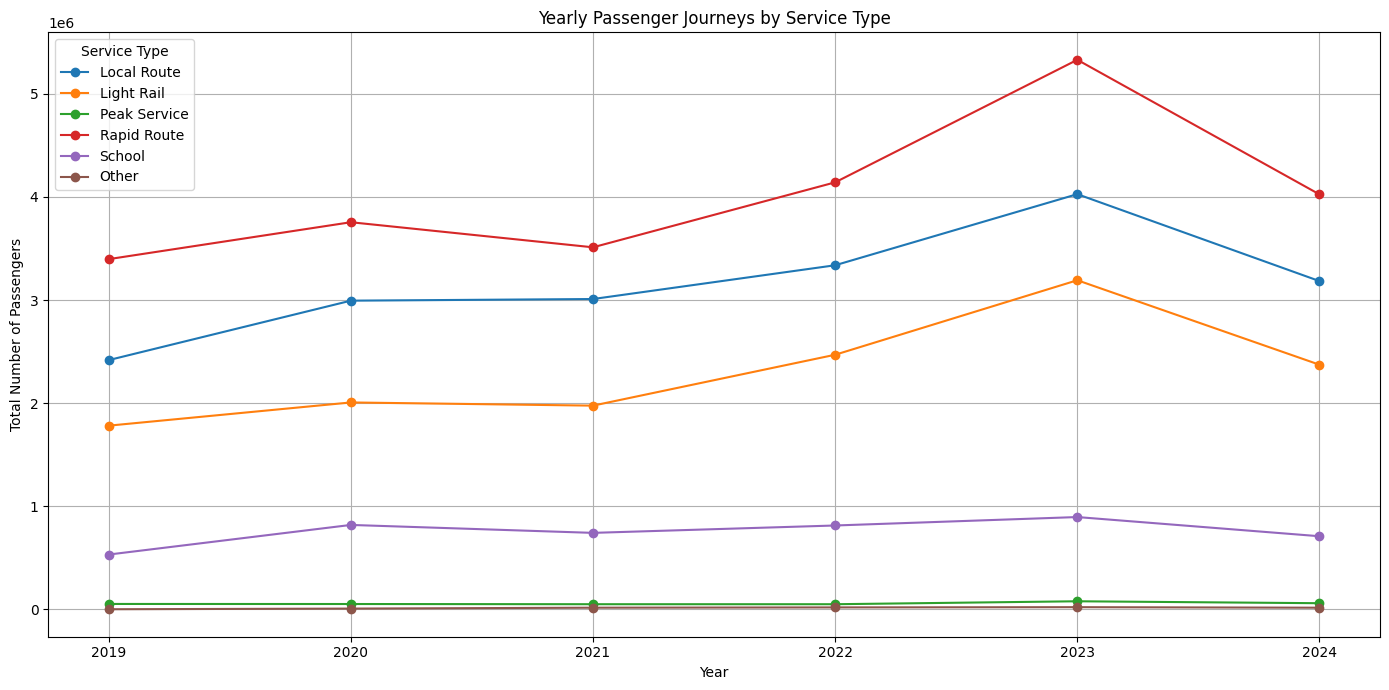

In [17]:
plt.figure(figsize=(14, 7))

for col in service_columns:
    plt.plot(yearly_ridership.index, yearly_ridership[col], marker='o', label=col)

plt.title('Yearly Passenger Journeys by Service Type')
plt.xlabel('Year')
plt.ylabel('Total Number of Passengers')
plt.xticks(yearly_ridership.index)
plt.legend(title='Service Type')
plt.grid(True)
plt.tight_layout()
plt.show()

### Observed Insights from Yearly Ridership Trends

The line plot illustrating yearly passenger journeys by service type provides a clear overview of how ridership has evolved over time:

1.  **Impact of 2020-2021 (COVID-19 Pandemic):**
    *   Most service types, particularly **Local Route**, **Light Rail**, and **Rapid Route**, show a noticeable dip or stagnation in ridership during 2020 and 2021. This aligns with the global COVID-19 pandemic, which led to lockdowns, remote work, and reduced travel.
    *   Interestingly, the **School** service, while showing some fluctuations, did not experience as drastic a decline as other services in terms of total sum, likely due to varying school opening policies and essential transport needs.

2.  **Recovery and Growth:**
    *   Following the 2020-2021 period, there's a strong and consistent recovery trend across most major service types from 2022 onwards, with **Local Route**, **Light Rail**, and **Rapid Route** showing significant growth in passenger numbers.
    *   The **Rapid Route** continues to be the most heavily used service, and its recovery appears robust, indicating a return to pre-pandemic or even higher levels by 2023.

3.  **Relative Performance of Service Types:**
    *   **Rapid Route** and **Local Route** consistently maintain the highest ridership figures throughout the observed years, highlighting their importance in the public transport network.
    *   **Light Rail** also demonstrates substantial usage and a similar recovery trajectory.
    *   **Peak Service** remains at a very low level compared to other services, with minimal year-to-year change, suggesting its specialized and limited operational scope.
    *   The **Other** category, while minor, shows a gradual increase in total yearly passengers, possibly indicating an expansion of niche services or better reporting.

4.  **Overall Trend:**
    *   The plot reveals an overall positive trend in public transport usage in recent years (2022-2023), indicating a rebound from the pandemic-induced downturn. This suggests a growing reliance on public transport as life returns to normalcy.

## Correlation Analysis Between Services




**Reasoning**:
First, I will calculate the correlation matrix for the specified service columns to understand the linear relationships between their daily passenger counts. Then, I will visualize this matrix as a heatmap for easy interpretation.



Correlation Matrix of Service Types:

              Local Route  Light Rail  Peak Service  Rapid Route    School  \
Local Route      1.000000    0.918795      0.944390     0.965122  0.852356   
Light Rail       0.918795    1.000000      0.879347     0.967736  0.685795   
Peak Service     0.944390    0.879347      1.000000     0.944997  0.728795   
Rapid Route      0.965122    0.967736      0.944997     1.000000  0.754290   
School           0.852356    0.685795      0.728795     0.754290  1.000000   
Other            0.469193    0.421638      0.377554     0.378470  0.429092   

                 Other  
Local Route   0.469193  
Light Rail    0.421638  
Peak Service  0.377554  
Rapid Route   0.378470  
School        0.429092  
Other         1.000000  


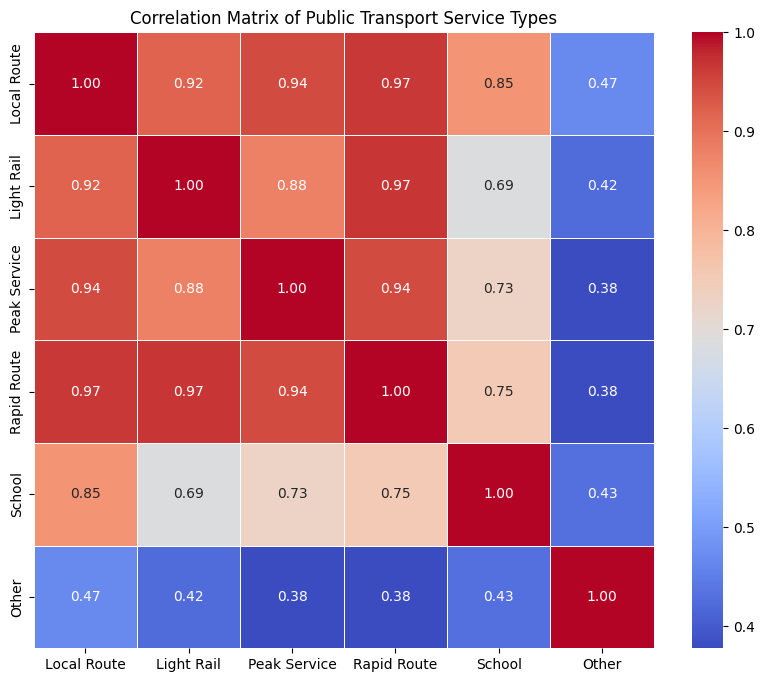

In [18]:
service_columns_for_corr = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']

# Calculate the correlation matrix
correlation_matrix = df[service_columns_for_corr].corr()

print("Correlation Matrix of Service Types:\n")
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Public Transport Service Types')
plt.show()

### Observed Insights from Correlation Analysis

The correlation heatmap provides valuable insights into how different public transport service types relate to each other in terms of daily passenger counts:

1.  **Strong Positive Correlations (Highly Interdependent Services):**
    *   **Local Route, Light Rail, Peak Service, and Rapid Route** show very strong positive correlations with each other (values generally above 0.85, with many above 0.90). This indicates that these services tend to experience similar daily ridership patterns. When one of these services sees an increase in passengers, the others are likely to see an increase as well, and vice versa. This strong interdependence suggests that they might be catering to a similar commuter base or are heavily influenced by the same external factors (e.g., general economic activity, school terms, major events).
    *   This strong correlation is expected as these are major public transport modes that often serve a broad general population, and their demand would largely move in sync.

2.  **Moderate to Strong Positive Correlation (School Service):**
    *   The **School** service shows moderate to strong positive correlations with **Local Route** (0.85), **Rapid Route** (0.75), **Peak Service** (0.73), and **Light Rail** (0.69). While still significant, these correlations are slightly lower than those among the main general-purpose services. This is logical, as school transport demand is heavily influenced by school days, which largely coincide with weekdays when other services also see high demand. However, school holidays would cause drops in 'School' service ridership without necessarily affecting other services to the same extent, leading to slightly weaker, though still substantial, correlations.

3.  **Weak Positive Correlations (Other Service):**
    *   The **Other** service category generally exhibits weak positive correlations with all other service types (values ranging from 0.38 to 0.47). This suggests that the 'Other' services have a less direct or less significant relationship with the major public transport services. Their ridership patterns are not as tightly linked to the daily fluctuations of the main routes. This could be due to 'Other' encompassing a diverse set of specialized or less frequently used services whose demand drivers are different.

**Overall Conclusion:**
Most major public transport services (`Local Route`, `Light Rail`, `Peak Service`, `Rapid Route`) are highly correlated, implying they serve a common passenger base with similar travel needs. The `School` service also follows these patterns but with slightly less intensity due to its specialized nature. The `Other` service category stands out as being less correlated, indicating more independent demand factors.


## Summary:

### Data Analysis Key Findings

*   **Overall Ridership Trends and Pandemic Impact**: Public transport passenger journeys experienced a significant dip between late 2019 and early 2021, likely due to the COVID-19 pandemic. Following this period, there has been a gradual and consistent recovery in passenger numbers across most services from 2022 onwards, although some may not have fully returned to pre-pandemic levels.
*   **Dominant Service Types**: 'Rapid Route' and 'Local Route' consistently exhibit the highest average daily passenger counts (e.g., 'Rapid Route' mean: 12,597.21; 'Local Route' mean: 9,891.07) and contribute most significantly to overall ridership. 'Light Rail' also shows substantial usage.
*   **Weekly Seasonality**: All major public transport services ('Local Route', 'Light Rail', 'Rapid Route', 'Peak Service') demonstrate significantly higher ridership during weekdays (Monday to Friday), with a considerable drop in passenger numbers on weekends (Saturday and Sunday). The 'School' service shows an even stronger weekday-centric pattern, with almost zero ridership on weekends.
*   **Service Variability**: 'Rapid Route' and 'Local Route' not only have the highest average passenger counts but also the highest variance (approx. 4.5 x 10^7 and 3.7 x 10^7, respectively), indicating substantial daily fluctuations. Conversely, 'Other' and 'Peak Service' have very low average passenger counts (e.g., 'Other' mean: 43.36; 'Peak Service' mean: 179.35) and low daily variability.
*   **Seasonal Decomposition of 'Rapid Route'**: The decomposition confirmed a clear trend of decline during the pandemic period (late 2019/early 2020) and subsequent recovery. It also highlighted a consistent weekly seasonality, with higher weekday usage. Residuals indicated unexplained variations, possibly due to external events not captured by the trend or seasonality.
*   **Yearly Ridership Recovery**: While most major services saw reduced ridership during 2020 and 2021, a strong recovery was observed in 2022 and 2023, with 'Rapid Route' showing particularly robust growth. The 'School' service was less affected by the pandemic downturn compared to other general services.
*   **Inter-Service Correlations**:
    *   'Local Route', 'Light Rail', 'Peak Service', and 'Rapid Route' show very strong positive correlations (generally above 0.85, many above 0.90), suggesting they cater to a similar commuter base and are influenced by common factors.
    *   The 'School' service has moderate to strong positive correlations with these major services (ranging from 0.69 to 0.85), indicating its demand partially aligns with general weekday travel but is also specialized.
    *   The 'Other' service category exhibits weak positive correlations (0.38 to 0.47) with all other types, implying more independent demand drivers.





###Key Insights from Analysis:

**1) Pandemic Impact: Sharp Ridership Decline Followed by Multi-Year Recovery**

The ridership data shows a steep decline between late 2019 and early 2021, aligning with global COVID-19 restrictions.
From 2022 onwards, passenger journeys steadily recovered, though some services have not yet reached pre-pandemic levels.

Why it matters:
This highlights the sensitivity of public transport usage to major external disruptions and helps understand long-term recovery behaviour.

**2) Rapid Route & Local Route Are the Core Demand Drivers**

Among all services:

Rapid Route and Local Route consistently record the highest average daily passengers.

They also show the largest fluctuations, indicating high but variable usage.

Light Rail is another strong contributor.

Why it matters:
These services are the backbone of the system and should receive priority when allocating resources, improving schedules, or planning capacity.

**3) Strong Weekly Seasonality Across All Major Services**

The dataset exhibits a clear weekday–weekend pattern:

Ridership peaks Monday to Friday

Drops significantly over Saturday and Sunday

School service shows an extreme weekday pattern with almost zero weekend usage

Why it matters:
This seasonal rhythm reflects commuter behaviour and is essential for accurate forecasting and operational planning.

**4) Service Variability Indicates Different Operational Roles**

Rapid Route and Local Route have high variance, showing strong fluctuations in daily passenger numbers.

Peak Service and Other services have low average counts and low variability, indicating stable, low-volume usage.

Why it matters:
High-variance services require flexible scheduling, more frequent monitoring, and dynamic resource allocation.
Low-variance services can operate with minimal adjustments.

**5) Strong Inter-Service Correlations Reveal Shared Demand Drivers**

Correlation analysis shows:

Local Route, Light Rail, Peak Service, and Rapid Route are strongly positively correlated (often > 0.85).

This means these services respond similarly to weekday patterns, holidays, or external factors.

School service also has moderate–strong correlations (0.69–0.85), confirming partial alignment with regular commuting demand.

Other service shows weak correlations, indicating a niche, independent usage pattern.

Why it matters:
Shared correlations suggest that similar seasonal and trend components can be used across multiple forecasting models, improving model consistency and reducing forecasting complexity.
